In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
# for now load the vanilla history file
fname = "/home/paradox/.bash_history"

In [60]:
data = []

In [61]:
with open(fname) as f:
    for line in f:
        data.append(line.strip())

In [62]:
df = pd.DataFrame(data, columns=['command_text'])

In [63]:
df.head()

,command_text
0,which pip
1,conda install pip
2,which pip
3,python
4,pip install numpy


In [64]:
df.shape

(2002, 1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 1 columns):
command_text    2002 non-null object
dtypes: object(1)
memory usage: 15.7+ KB


In [66]:
df.describe()

,command_text
count,2002
unique,654
top,ls
freq,353


In [67]:
def extract_command(text):
    tokens = text.split()
    return '' if not tokens else tokens[0]

In [68]:
df['command'] = df['command_text'].apply(extract_command)

In [69]:
df

,command_text,command
0,which pip,which
1,conda install pip,conda
2,which pip,which
3,python,python
4,pip install numpy,pip
5,pip install pip --upgrade,pip
6,pip install jupyter,pip
7,python,python
8,pip install pandas matplotlib scikit-learn,pip
9,python,python


## histogram plot

In [70]:
# get unique commands
unique = df['command'].unique()
print(unique.shape)
print(unique)

(133,)
['which' 'conda' 'python' 'pip' 'cd' 'ls' 'mkdir' 'grep' 'nvim' 'firefox'
 'whereis' 'sudo' 'acpi' 'temperature.sh' 'sensorrs' 'sensors' 'alsamixer'
 'cat/proc/asound/cards' 'cat' 'asoundconf' 'startx' 'reboot' 'alsactl'
 'speaker-test' 'adduser' '/usr/sbin/adduser' 'useradd' 'ifconfig'
 'gnome-terminal' 'df' 'yay' 'xterm' 'urxvt' 'urxvt-tabbed' 'rip' 'pwd'
 'compton' 'pacman' 'uname' 'inxi' 'fakeroot' '\x01' 'fwupdmgr' 'flashrom'
 'htop' 'glxinfo' 'source' 'd' 'jupyter' 'xset' 'unzip' 'pkill' 'playx'
 'mpv' 't' 'git' 'catless' 'vim' '/etc/hos' 'lsls' 'sls' 'apython' 'chmod'
 './manage.py' '/usr/bin/env' 'glxgears' 'mperceppt' 'up' 'find'
 'youtube-dl' 'fg' 'lyrics.py' 'nviim' 'mv' 'fdisk'
 'android-file-transfer' 'cp' 'scrot' 'gpicview' 'thunar' 'gedit' 'लस'
 'fgk' 'LS' 'make' './darknet' '' './make' './darknet/' 'rm' 'md5'
 'md5sum' 'libopencv-dev' 'redshift-gtk' 'p' 'systemctl'
 '/usr/bin/redshift-gtk' 'screen-eat' './screen-eat' 'ffmpeg' 'locate'
 'python2' 'mportError:' '.n

In [71]:
# count each command
df['command'].value_counts()

ls                       357
cd                       259
python                   250
fg                       182
sudo                     111
nvim                      94
pip                       74
./darknet                 66
git                       55
playx                     43
source                    37
startx                    34
which                     33
rip                       31
make                      23
xset                      22
conda                     18
pwd                       17
wget                      11
mkdir                     11
redshift-gtk              10
catless                    9
jupyter                    9
up                         9
rm                         8
unzip                      7
cat                        7
scrot                      6
mv                         6
lsusb                      6
                        ... 
LS                         1
df                         1
firefox                    1
./make        

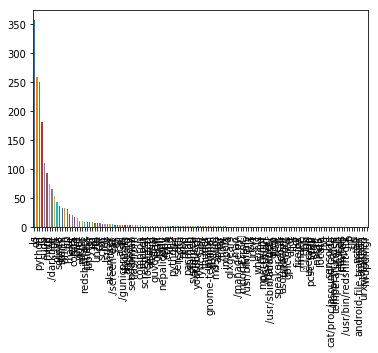

In [72]:
# get histogram plot
df['command'].value_counts().plot(kind='bar')

In [74]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

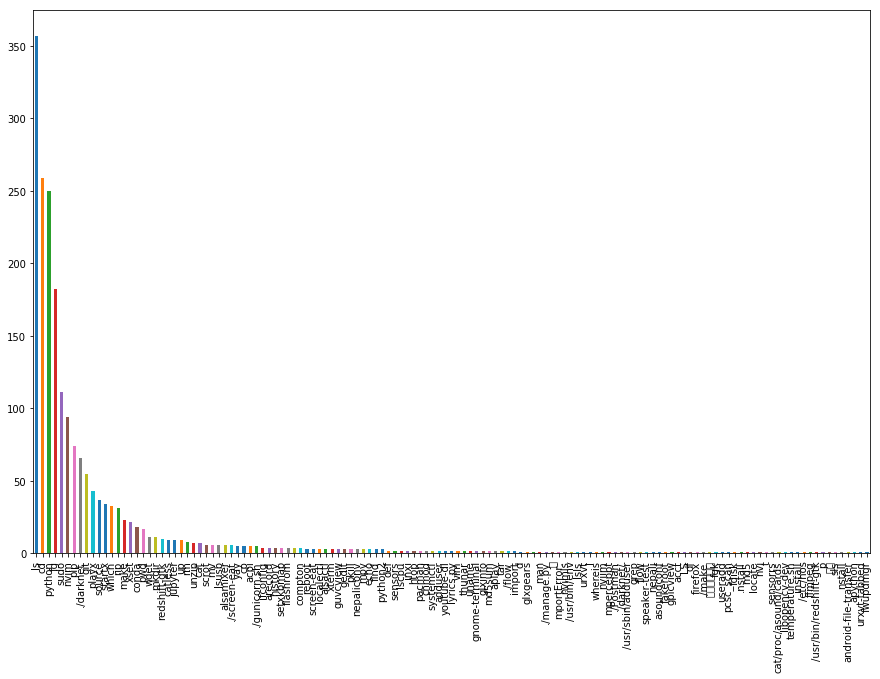

In [75]:
# histogram plot -> bigger size
df['command'].value_counts().plot(kind='bar')

### top N mostly used commands

In [79]:
n = 20
df['command'].value_counts()[:n]

ls           357
cd           259
python       250
fg           182
sudo         111
nvim          94
pip           74
./darknet     66
git           55
playx         43
source        37
startx        34
which         33
rip           31
make          23
xset          22
conda         18
pwd           17
wget          11
mkdir         11
Name: command, dtype: int64

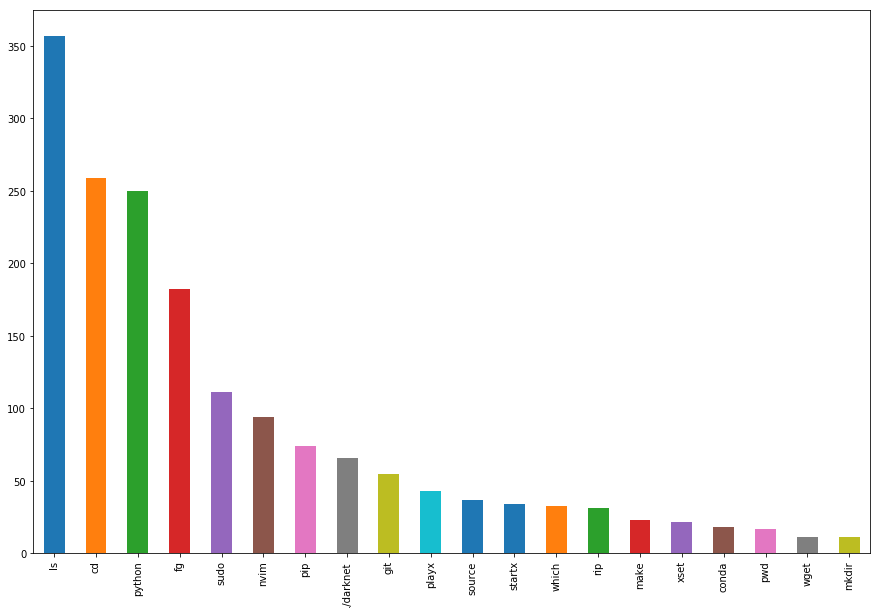

In [80]:
# histogram plot -> bigger size
df['command'].value_counts()[:n].plot(kind='bar')

### least used commands

In [81]:
n = 20

In [82]:
n = 20
df['command'].value_counts()[-n:]

md5                      1
locate                   1
nvi                      1
t                        1
sensorrs                 1
cat/proc/asound/cards    1
libopencv-dev            1
temperature.sh           1
install                  1
/etc/hos                 1
ffmpeg                   1
/usr/bin/redshift-gtk    1
p                        1
लस                       1
sls                      1
nstall                   1
android-file-transfer    1
apython                  1
urxvt-tabbed             1
fwupdmgr                 1
Name: command, dtype: int64

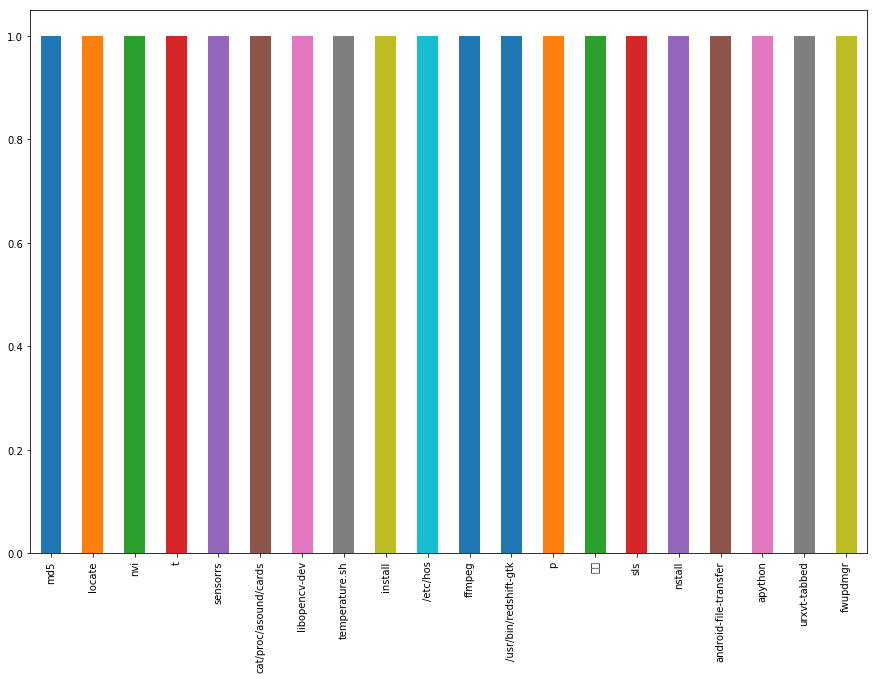

In [83]:
# histogram plot -> bigger size
df['command'].value_counts()[-n:].plot(kind='bar')